# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
from pyspark.sql import SparkSession, Row
import pyspark.sql.functions as F

In [71]:
import seaborn as sns

In [2]:
spark = SparkSession.builder.master("local[1]").appName("scores").getOrCreate()

23/01/02 18:30:13 WARN Utils: Your hostname, xkeyscore resolves to a loopback address: 127.0.1.1; using 192.168.1.10 instead (on interface wlp0s20f3)
23/01/02 18:30:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/02 18:30:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/01/02 18:30:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/01/02 18:30:14 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
23/01/02 18:30:14 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
23/01/02 18:30:14 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [3]:
apple = spark.read.csv("appl_1980_2014.csv", inferSchema=True,header=True)

In [4]:
apple.show(10)

+-------------------+-----+-----+-----+-----+--------+---------+
|               Date| Open| High|  Low|Close|  Volume|Adj Close|
+-------------------+-----+-----+-----+-----+--------+---------+
|2014-07-08 00:00:00|96.27| 96.8|93.92|95.35|65130000|    95.35|
|2014-07-07 00:00:00|94.14|95.99| 94.1|95.97|56305400|    95.97|
|2014-07-03 00:00:00|93.67| 94.1| 93.2|94.03|22891800|    94.03|
|2014-07-02 00:00:00|93.87|94.06|93.09|93.48|28420900|    93.48|
|2014-07-01 00:00:00|93.52|94.07|93.13|93.52|38170200|    93.52|
|2014-06-30 00:00:00| 92.1|93.73|92.09|92.93|49482300|    92.93|
|2014-06-27 00:00:00|90.82| 92.0|90.77|91.98|64006800|    91.98|
|2014-06-26 00:00:00|90.37|91.05| 89.8| 90.9|32595800|     90.9|
|2014-06-25 00:00:00|90.21| 90.7|89.65|90.36|36852200|    90.36|
|2014-06-24 00:00:00|90.75|91.74|90.19|90.28|38988300|    90.28|
+-------------------+-----+-----+-----+-----+--------+---------+
only showing top 10 rows



### Step 4.  Check out the type of the columns

In [5]:
apple.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



### Step 5. Transform the Date column as a datetime type

In [6]:
#  already in datetime format

### Step 6.  Set the date as the index

In [8]:
#  not possible in pyspark

### Step 7.  Is there any duplicate dates?

In [13]:
if apple.count() > apple.drop_duplicates(['Date']).count():
    print("Data has duplication")
else:
    print("No Duplication")

No Duplication


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [18]:
apple.select('*').sort('Date',ascending=True).show()

+-------------------+-----+-----+-----+-----+---------+---------+
|               Date| Open| High|  Low|Close|   Volume|Adj Close|
+-------------------+-----+-----+-----+-----+---------+---------+
|1980-12-12 00:00:00|28.75|28.87|28.75|28.75|117258400|     0.45|
|1980-12-15 00:00:00|27.38|27.38|27.25|27.25| 43971200|     0.42|
|1980-12-16 00:00:00|25.37|25.37|25.25|25.25| 26432000|     0.39|
|1980-12-17 00:00:00|25.87| 26.0|25.87|25.87| 21610400|      0.4|
|1980-12-18 00:00:00|26.63|26.75|26.63|26.63| 18362400|     0.41|
|1980-12-19 00:00:00|28.25|28.38|28.25|28.25| 12157600|     0.44|
|1980-12-22 00:00:00|29.63|29.75|29.63|29.63|  9340800|     0.46|
|1980-12-23 00:00:00|30.88| 31.0|30.88|30.88| 11737600|     0.48|
|1980-12-24 00:00:00| 32.5|32.63| 32.5| 32.5| 12000800|     0.51|
|1980-12-26 00:00:00| 35.5|35.62| 35.5| 35.5| 13893600|     0.55|
|1980-12-29 00:00:00| 36.0|36.13| 36.0| 36.0| 23290400|     0.56|
|1980-12-30 00:00:00|35.25|35.25|35.12|35.12| 17220000|     0.55|
|1980-12-3

### Step 9. Get the last business day of each month

In [55]:
a = apple.select('Date', F.date_format('Date','yyyy-MM').alias('month'))
a.show(10)

+-------------------+-------+
|               Date|  month|
+-------------------+-------+
|2014-07-08 00:00:00|2014-07|
|2014-07-07 00:00:00|2014-07|
|2014-07-03 00:00:00|2014-07|
|2014-07-02 00:00:00|2014-07|
|2014-07-01 00:00:00|2014-07|
|2014-06-30 00:00:00|2014-06|
|2014-06-27 00:00:00|2014-06|
|2014-06-26 00:00:00|2014-06|
|2014-06-25 00:00:00|2014-06|
|2014-06-24 00:00:00|2014-06|
+-------------------+-------+
only showing top 10 rows



In [57]:
a.select('Date', 'month').groupby('month').agg(F.max('Date')).sort('month',ascending=True).show(10)

+-------+-------------------+
|  month|          max(Date)|
+-------+-------------------+
|1980-12|1980-12-31 00:00:00|
|1981-01|1981-01-30 00:00:00|
|1981-02|1981-02-27 00:00:00|
|1981-03|1981-03-31 00:00:00|
|1981-04|1981-04-30 00:00:00|
|1981-05|1981-05-29 00:00:00|
|1981-06|1981-06-30 00:00:00|
|1981-07|1981-07-31 00:00:00|
|1981-08|1981-08-31 00:00:00|
|1981-09|1981-09-30 00:00:00|
+-------+-------------------+
only showing top 10 rows



### Step 10.  What is the difference in days between the first day and the oldest

In [64]:
a.select(
 F.max('Date')- F.min('Date').alias('difference')
    ).head(1)

[Row((max(Date) - min(Date) AS difference)=datetime.timedelta(days=12261))]

### Step 11.  How many months in the data we have?

In [70]:
a.select('month').distinct().count()

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [73]:
apple_pd = apple.toPandas()

<AxesSubplot: xlabel='Date', ylabel='Adj Close'>

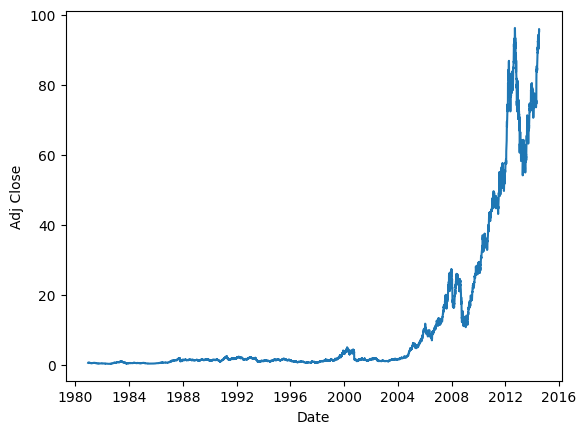

In [74]:
sns.lineplot(x=apple_pd['Date'], y=apple_pd['Adj Close'])

### BONUS: Create your own question and answer it.